# 样式管理

In [35]:
%matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns

# sin函数画图
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

## 使用axes_style()和set_style()控制外观

预设的seaborn主题：暗网格(darkgrid)，白网格(whitegrid)，全黑(dark)，全白(white)，全刻度(ticks)

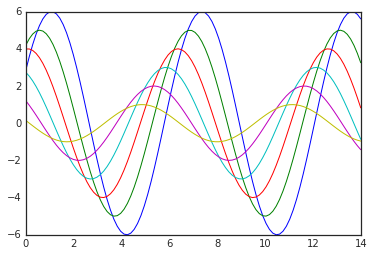

In [14]:
sinplot()
plt.show()

### dark主题

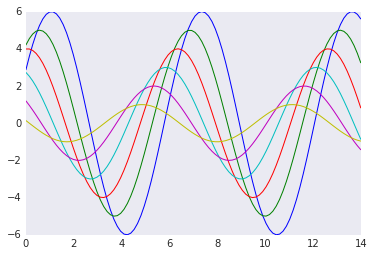

In [12]:
sns.set_style('dark')
sinplot()
plt.show()

### white主题

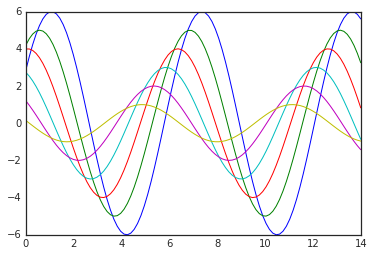

In [13]:
sns.set_style('white')
sinplot()
plt.show()

### ticks主题

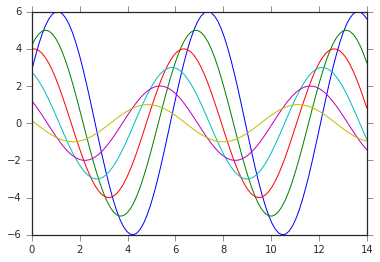

In [15]:
sns.set_style('ticks')
sinplot()
plt.show()

### axes_style()可以方便的临时改变绘图主题

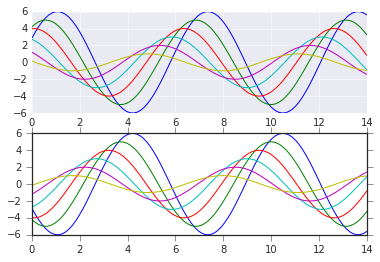

In [17]:
with sns.axes_style('darkgrid'):
    plt.subplot(211)
    sinplot()

plt.subplot(212)
sinplot(-1)
plt.show()

# 绘图函数

## 可视化数据的分布

In [33]:
from scipy import stats, integrate

## 绘制单变量分布

displot()函数，默认绘制一个直方图，并且同时画出核密度估计(KDE)

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


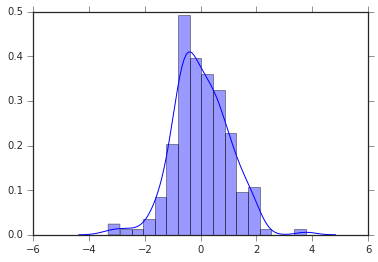

In [20]:
x = np.random.normal(size=200)
sns.distplot(x)
plt.show()

## 直方图

### 数据刻度rug,核密度kde

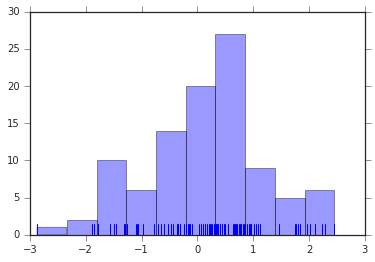

In [22]:
x = np.random.normal(size=100)
sns.distplot(x, kde=False, rug=True)
plt.show()

### 指定数据段的多少bins

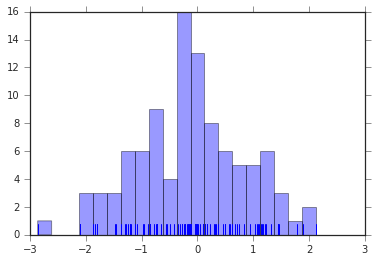

In [25]:
x = np.random.normal(size=100)
sns.distplot(x, bins=20, kde=False, rug=True)
plt.show()

## 核密度估计

### 直方图hist

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


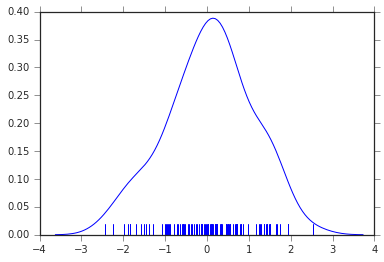

In [26]:
x = np.random.normal(size=100)
sns.distplot(x, hist=False, rug=True)
plt.show()

### 当只需要密度估计 distplot()

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


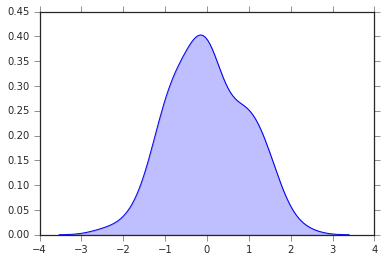

In [27]:
x = np.random.normal(size=100)
sns.kdeplot(x, shade=True)
plt.show()

### kde的带宽

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


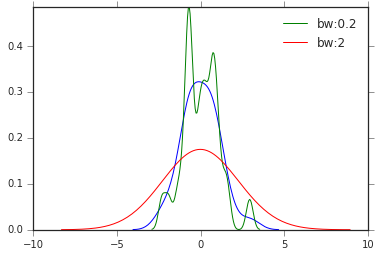

In [30]:
x = np.random.normal(0, 1, size=30)

sns.kdeplot(x)
sns.kdeplot(x, bw=.2, label='bw:0.2')
sns.kdeplot(x, bw=2, label='bw:2')

plt.show()

### 拟合参数分布

使用distplot()将参数分布拟合到数据集

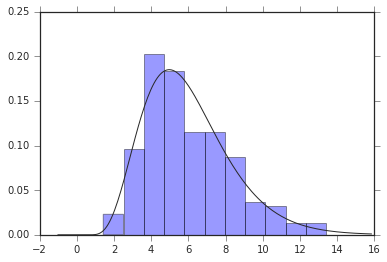

In [34]:
x = np.random.gamma(6, size=200)
sns.distplot(x, kde=False, fit=stats.gamma)
plt.show()

## 绘制二元函数

### 使用jointplot()函数创建多面板图

In [37]:
import pandas as pd

mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=['x', 'y'])

### 散点图

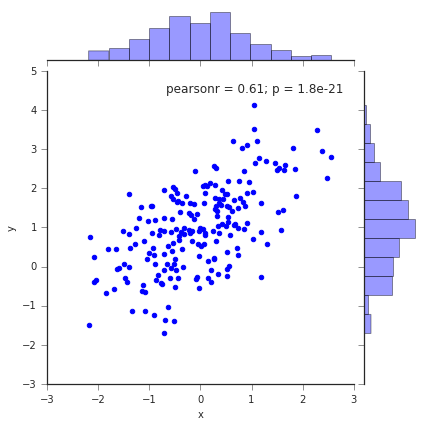

In [38]:
sns.jointplot(x='x', y='y', data=df)
plt.show()

### Hexbin图(六边形图)

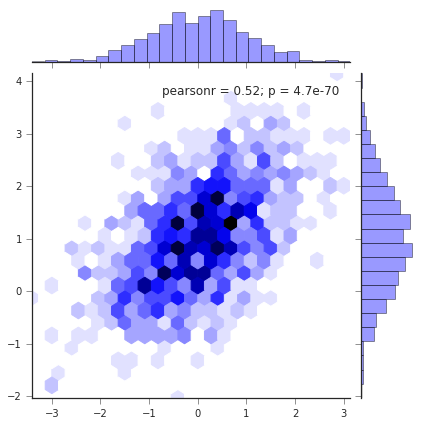

In [43]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
sns.jointplot(x=x, y=y, kind='hex')
plt.show()

### 核密度估计

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


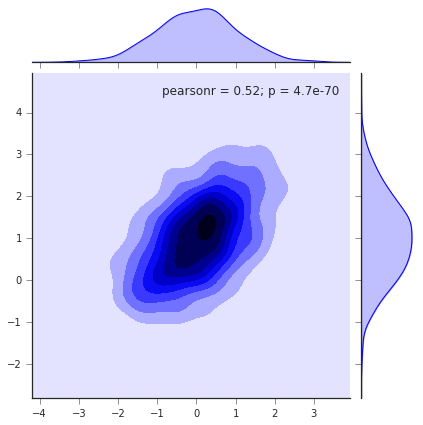

In [46]:
sns.jointplot(x=x, y=y, data=df, kind='kde')
plt.show()

使用kdeplot()函数绘制二维核密度图

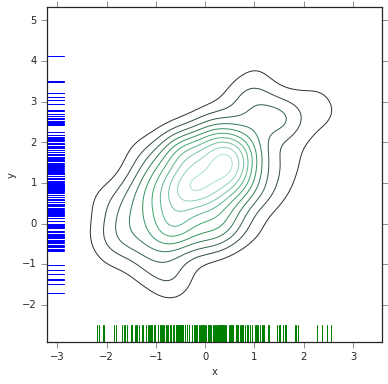

In [52]:
f, ax = plt.subplots(figsize=(6, 6))

sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color='g', ax=ax)
# vertical控制y列数据是否垂直放置
sns.rugplot(df.y, vertical=True, ax=ax)

plt.show()

### 通过增加轮廓线数量使密度变量更连续

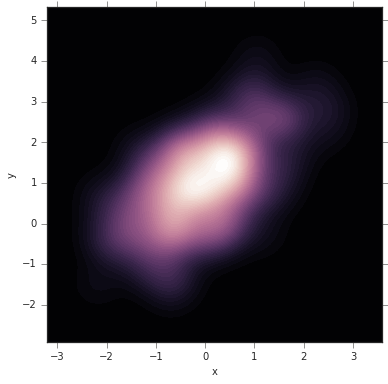

In [54]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True)
plt.show()

### 使用JointGride()实现jointplot()功能

jointplot()函数使用JointGrid来管理图形，为增加灵活度，可以直接使用JointGrid来绘制U型

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


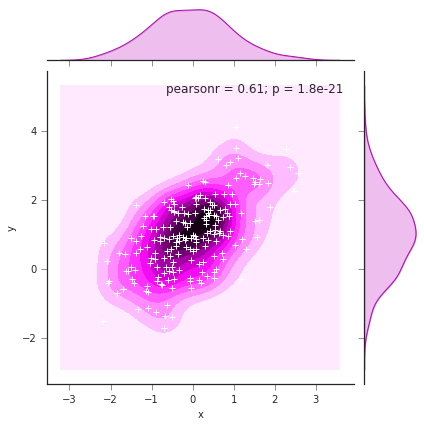

In [56]:
g = sns.jointplot(x='x', y='y', data=df, kind='kde', color='m')
g.plot_joint(plt.scatter, c='w', s=30, linewidth=1, marker='+')
plt.show()

## 可视化数据集中成对的关系

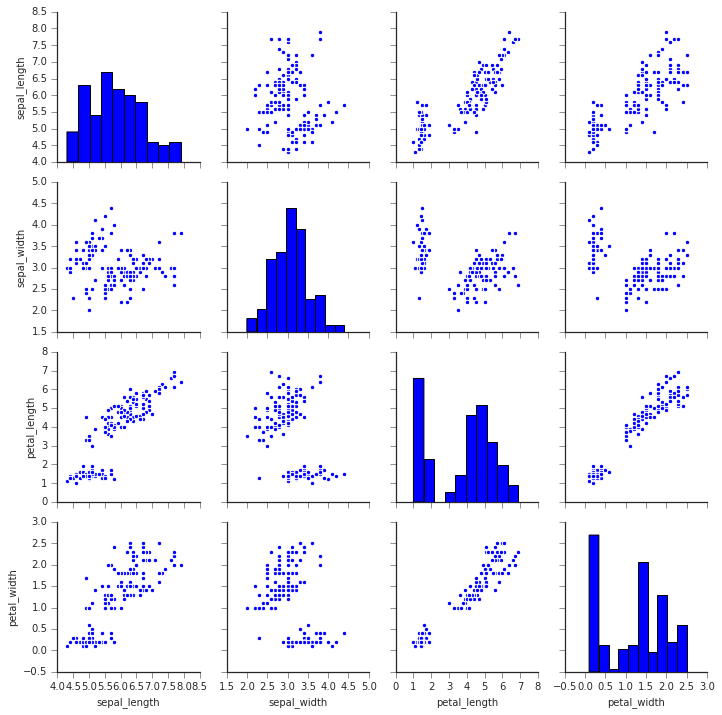

In [77]:
iris = sns.load_dataset('iris')
sns.pairplot(iris)
plt.show()

### 使用PairGrid实现pairplot()函数功能

C:\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j
C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


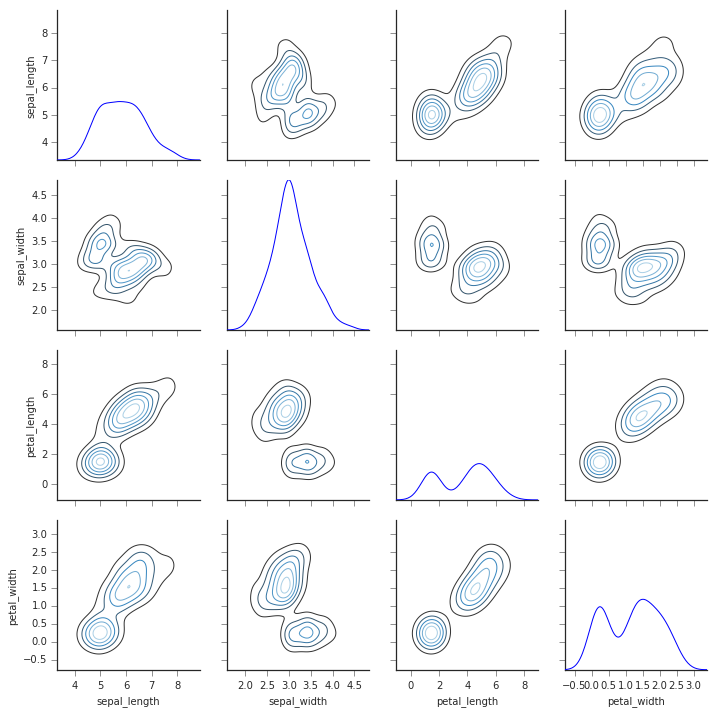

In [82]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, cmap='Blues_d', n_levels=6)
plt.show()